# Exercise 6.4

### Contents:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Comparison of Model Performance on Training vs. Test Set

## 1. Importing libraries and data

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [11]:
# setting path

path = r'/Users/shikhakamboj/Documents/Part-6 Achievement 6'

# import data 

df_cleaned_data = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'flavors_of_cacao_cleaned.csv'), index_col = 0)

## 2. Data Cleaning

In [14]:
df_cleaned_data.columns

Index(['Company', 'Specific_Bean_Origin', 'Review_Date', 'Cocoa_Percent',
       'Company_Location', 'Rating', 'Bean_Type', 'Broad_Bean_Origin'],
      dtype='object')

In [16]:
df_cleaned_data.head()

Company Specific_Bean_Origin  Review_Date  Cocoa_Percent Company_Location  \
0  A. Morin          Agua Grande         2016           63.0           France   
1  A. Morin                Kpime         2015           70.0           France   
2  A. Morin               Atsane         2015           70.0           France   
3  A. Morin                Akata         2015           70.0           France   
4  A. Morin               Quilla         2015           70.0           France   

   Rating Bean_Type Broad_Bean_Origin  
0    3.75   Unknown          Sao Tome  
1    2.75   Unknown              Togo  
2    3.00   Unknown              Togo  
3    3.50   Unknown              Togo  
4    3.50   Unknown              Peru

In [18]:
df_cleaned_data.shape

(1863, 8)

In [24]:
# Check for missing values

df_cleaned_data.isnull().sum()

Company                 0
Specific_Bean_Origin    0
Review_Date             0
Cocoa_Percent           0
Company_Location        0
Rating                  0
Bean_Type               0
Broad_Bean_Origin       0
dtype: int64

No missing values present in the dataset.

In [30]:
dups = df_cleaned_data[df_cleaned_data.duplicated()]
dups

Empty DataFrame
Columns: [Company, Specific_Bean_Origin, Review_Date, Cocoa_Percent, Company_Location, Rating, Bean_Type, Broad_Bean_Origin]
Index: []

No duplicates present in the dataset.

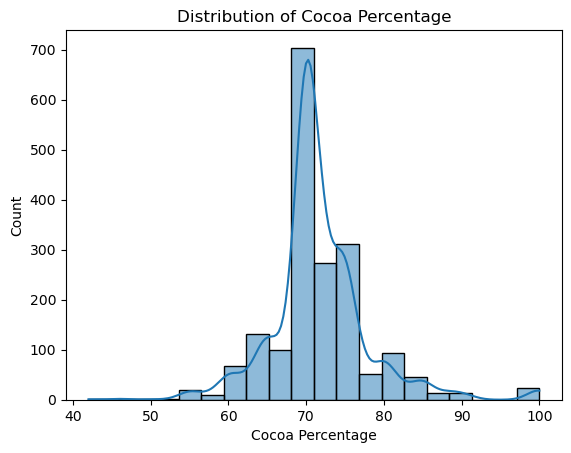

In [37]:
# Extreme value checks

sns.histplot(df_cleaned_data['Cocoa_Percent'], bins=20, kde=True)
plt.title("Distribution of Cocoa Percentage")
plt.xlabel("Cocoa Percentage")
plt.ylabel("Count")
plt.show()

In [41]:
# Check mean

df_cleaned_data['Cocoa_Percent'].mean()

71.70289855072464

In [43]:
# Check the median

df_cleaned_data['Cocoa_Percent'].median()

70.0

In [45]:
# Check the max

df_cleaned_data['Cocoa_Percent'].max()

100.0

## 3. Data prep for Regression Analysis

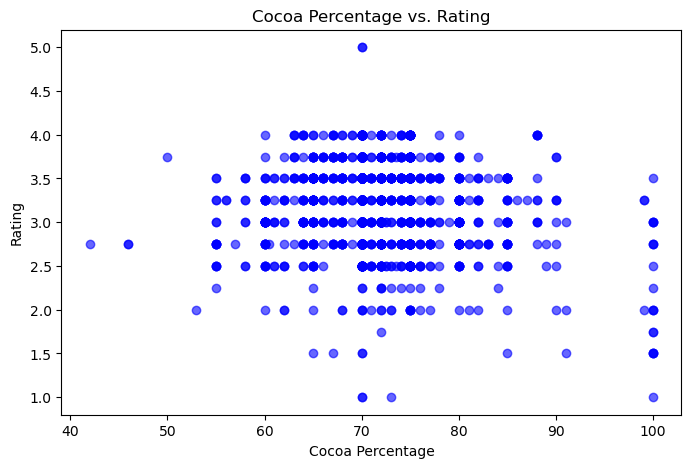

In [53]:
# Scatterplot for Cocoa Percentage vs. Rating

plt.figure(figsize=(8, 5))
plt.scatter(df_cleaned_data['Cocoa_Percent'], df_cleaned_data['Rating'], alpha=0.6, color='blue')
plt.title("Cocoa Percentage vs. Rating")
plt.xlabel("Cocoa Percentage")
plt.ylabel("Rating")
plt.show()

### Hypothesis

1. Null Hypothesis:  There is no significant relationship between Cocoa_Percent and Rating meaning increasing or decreasing the cocoa percentage does not affect the rating.
2. Alternative Hypothesis: Cocoa_Percent has a significant impact on Rating meaning as the Cocoa_Percent increases, the rating either increases or decreases significantly.

In [55]:
# Convert Cocoa_Percent (X) and Rating (y) into NumPy arrays and reshape

X = df_cleaned_data['Cocoa_Percent'].values.reshape(-1, 1)  # Independent Variable
y = df_cleaned_data['Rating'].values.reshape(-1, 1)  # Dependent Variable

In [57]:
X

array([[63.],
       [70.],
       [70.],
       ...,
       [65.],
       [62.],
       [65.]])

In [59]:
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]])

In [63]:
# Split the dataset into training (80%) and testing (20%) sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Regression analysis

In [66]:
# Create the model

model = LinearRegression()

In [68]:
# Fit the model to the training data

model.fit(X_train, y_train)

LinearRegression()

In [70]:
# Predict y values for the test set

y_pred = model.predict(X_test)

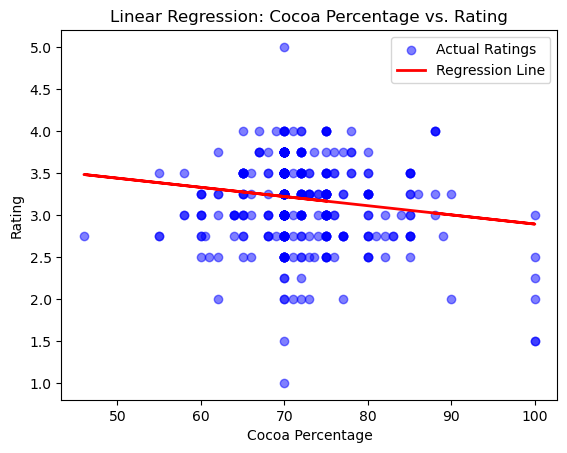

In [72]:
# Create a plot that shows the regression line on the test set
plt.scatter(X_test, y_test, color='blue', label="Actual Ratings", alpha=0.5)

# Plot regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")

# Labels and title
plt.xlabel("Cocoa Percentage")
plt.ylabel("Rating")
plt.title("Linear Regression: Cocoa Percentage vs. Rating")
plt.legend()
plt.show()

The regression line has a slight negative slope, indicating that as Cocoa Percentage increases, the Rating slightly decreases. The spread of data points suggests that while Cocoa Percentage has some effect, other factors might also influence the rating.

In [75]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)

In [77]:
# Print the model summary statistics from where we evaluate the performance of the model.

print('Slope:' ,model.coef_)
print('Mean squared error: ', mse)
print('Root Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01092842]]
Mean squared error:  0.24759769472984772
Root Mean squared error:  0.4975918957638355
R2 score:  0.013049703609409269


In [79]:
# Create a dataframe comparing the actual and predicted values of y.

comparison_df = pd.DataFrame({
    "Actual Ratings": y_test.flatten(),
    "Predicted Ratings": y_pred.flatten()
})

In [81]:
comparison_df.head()

Actual Ratings  Predicted Ratings
0            3.50           3.164293
1            2.50           3.262649
2            3.00           3.218935
3            2.50           3.218935
4            3.25           3.197078

## Now, Comparing how the regression fits the training set

In [84]:
y_train_pred = model.predict(X_train) # This generates predictions for the training data

In [88]:
# Calculate MSE and R-squared Score for training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

In [90]:
print('Slope:' ,model.coef_)
print('Mean squared error: ', mse_train)
print('R2 score: ', r2_train)

Slope: [[-0.01092842]]
Mean squared error:  0.2192072652841897
R2 score:  0.020581592069091714


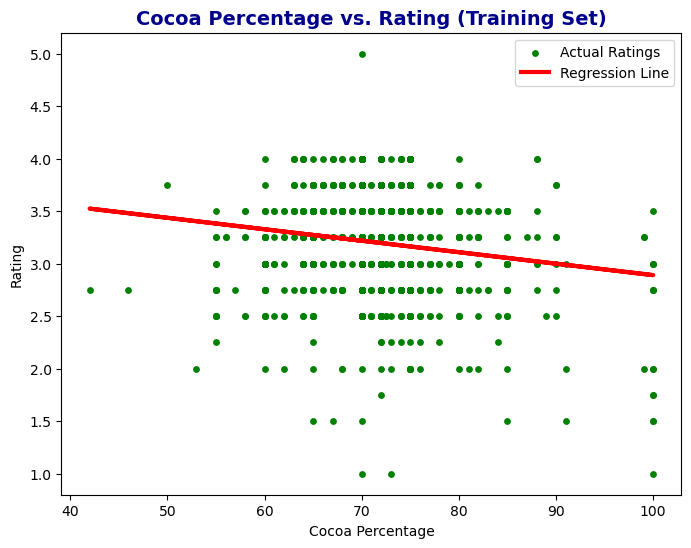

In [96]:
# Visualize the Regression Fit on Training Set

# Create the plot
plt.figure(figsize=(8,6))

# Scatter plot of actual data points
plt.scatter(X_train, y_train, color='green', s=15, label="Actual Ratings")

# Regression line
plt.plot(X_train, y_train_pred, color='red', linewidth=3, label="Regression Line")

# labels and title
plt.title("Cocoa Percentage vs. Rating (Training Set)", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Cocoa Percentage")
plt.ylabel("Rating")
plt.legend()
plt.show()

### Comparison of Model Performance on Training vs. Test Set

1. The regression coefficient (-0.0109) is the same for both sets, meaning the model's prediction trend is consistent.
2. Training MSE (0.2192) < Test MSE (0.2476), indicates that the model performs slightly better on the training set but not significantly.
3. Training R-squared (0.0206) is slightly higher than Test R-squared (0.0130), indicates that Cocoa Percentage alone is not a strong predictor of Ratings.

## How well the model performed on the test set?

1. Weak Fit:  R-squared =0.013, meaning the model explains only 1.3% of the variance.
2. High Error: rmse ~ 0.50, meaning predictions are off by half a rating point on average.
3. Minimal Impact: The small negative slope suggests Cocoa Percentage has little effect on ratings.

##  Possible Data Bias & Impact

1. Other factors like Bean Type, Company, Origin influence ratings more than Cocoa Percentage.
2. Uneven Data: Certain Cocoa Percentage values may be overrepresented, skewing results.